# Assignment 2

## Gridworld MDP Value Function Comparison with Different Reward Structures

This assignment simulates a Markov Decision Process (MDP) in a Gridworld environment, where an agent navigates a 5x5 grid. The agent can take one of four actions (move north, south, east, or west) in each state. The environment provides different rewards based on the agent's actions, including special rewards in certain states (like A and B). The goal is to compute the value function of the agent for each state under two different reward configurations and visualize how these configurations affect the agent's behavior. Through this exercise, the impact of reward design on the agent’s decision-making process is explored, and a comparison of value functions is presented.

### libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Defineing the Gridworld Environment

This function defines the grid and the reward settings. The grid has special states A and B, which provide unique rewards and transition rules.

In [2]:
class Gridworld:
    def __init__(self, reward_func):
        # Grid layout for the 5x5 grid
        self.grid = np.zeros((5, 5))

        # Special states A and B
        self.state_A = (0, 1)
        self.state_B = (3, 3)

        # Reward function based on the setting
        self.reward_func = reward_func

    def get_state_reward(self, state):
        if state == self.state_A:
            return 10  # Reward from state A
        elif state == self.state_B:
            return 5   # Reward from state B
        elif state[0] < 0 or state[0] >= 5 or state[1] < 0 or state[1] >= 5:
            return -1  # Out of bounds, reward -1
        else:
            return 0  # Normal grid state, reward 0

    def next_state(self, state, action):
        # Action: 0 = North, 1 = South, 2 = East, 3 = West
        x, y = state
        if action == 0:  # North
            x -= 1
        elif action == 1:  # South
            x += 1
        elif action == 2:  # East
            y += 1
        elif action == 3:  # West
            y -= 1

        # Check if out of bounds
        if x < 0 or x >= 5 or y < 0 or y >= 5:
            return (x, y), self.get_state_reward((x, y))

        return (x, y), self.get_state_reward((x, y))


### Defineing the Agent’s Policy

We now define the policy function. This is the mapping from states to actions. For simplicity, we will use a random policy here where the agent selects a random action.

In [3]:
def random_policy(state):
    # 4 possible actions: North, South, East, West
    return random.choice([0, 1, 2, 3])

### Simulateing the MDP

Now, we simulate the Markov chain for 1000 steps, where the agent moves through the grid following the policy and the reward function.

In [4]:
def simulate_mdp(grid, policy, num_steps=1000):
    state = (0, 0)  # Start at the top-left corner (0, 0)
    trajectory = []

    for _ in range(num_steps):
        action = policy(state)  # Choose action based on policy
        next_state, reward = grid.next_state(state, action)  # Get next state and reward
        trajectory.append((state, action, reward, next_state))
        state = next_state  # Move to the next state

    return trajectory


### Value Function Computation

We’ll now compute the value function for each state. The value function can be calculated by taking the average reward across multiple runs, considering the discount factor gamma (γ).

In [5]:
def compute_value_function(trajectory, gamma=0.9):
    value_function = {}
    for state, action, reward, next_state in trajectory:
        if state not in value_function:
            value_function[state] = 0
        # Use the discount factor for future rewards
        value_function[state] += reward + gamma * value_function.get(next_state, 0)
    # Normalize values
    for state in value_function:
        value_function[state] /= len(trajectory)
    return value_function

### Compareing Two Reward Functions

Finally, we compute the value function under two different reward functions and compare them:

Reward Function 1:

Reward = -1 if out of bounds, +10 for state A, +5 for state B, and 0 otherwise.

Reward Function 2:

Reward = 5 if out of bounds, +16 for state A, and +11 for state B.

In [6]:
reward_func_1 = lambda state: -1 if state[0] < 0 or state[0] >= 5 or state[1] < 0 or state[1] >= 5 else 0
reward_func_2 = lambda state: 5 if state[0] < 0 or state[0] >= 5 or state[1] < 0 or state[1] >= 5 else 0
grid1 = Gridworld(reward_func_1)
grid2 = Gridworld(reward_func_2)

trajectory1 = simulate_mdp(grid1, random_policy)
trajectory2 = simulate_mdp(grid2, random_policy)

value_func_1 = compute_value_function(trajectory1)
value_func_2 = compute_value_function(trajectory2)

### Visualizeing the Results

We can visualize the value functions for both reward settings using matplotlib.

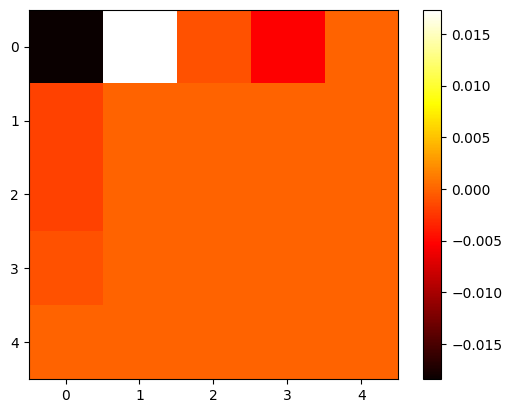

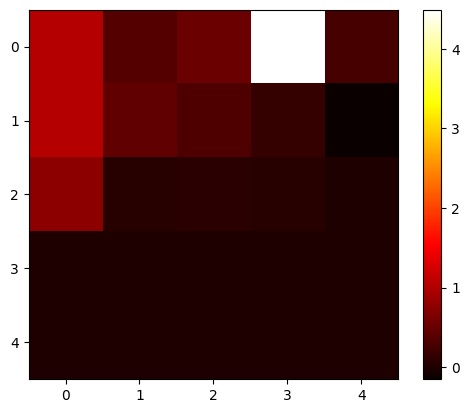

In [8]:
def plot_value_function(value_function):
    grid = np.zeros((5, 5))  # 5x5 grid

    # Fill grid values based on state positions
    for (i, j), value in value_function.items():
        if 0 <= i < 5 and 0 <= j < 5:  # Check if the state is within bounds
            grid[i][j] = value

    plt.imshow(grid, cmap="hot", interpolation="nearest")
    plt.colorbar()
    plt.show()

# Call the plotting function for both value functions
plot_value_function(value_func_1)
plot_value_function(value_func_2)


Top Grid (Reward Setting 1):

-The grid is predominantly orange, indicating a very low or negative value for most of the grid states.

-Black and white spots indicate out-of-bound actions or special states, where the value is either minimal or undefined.

-The red and yellow color indicates higher values in specific regions, possibly near special states like A or B.



Bottom Grid (Reward Setting 2):

-The grid is mostly dark red and black, which suggests higher reward values compared to the top grid.

-White spots still indicate special states or transitions that involve a significant reward, like state B (with a reward of 5).

Interpretation:

The top grid shows that under the first reward setting, moving off the grid or taking certain actions results in negative rewards. It represents a scenario where penalizing out-of-bound moves results in a more neutral or slightly negative value function.

The bottom grid has higher values, likely because state A and state B provide significantly higher rewards (16 and 11, respectively). The agent thus tends to favor these regions, reflected in the higher values.

This demonstrates how changing the reward structure affects the agent's behavior and the resulting value function.